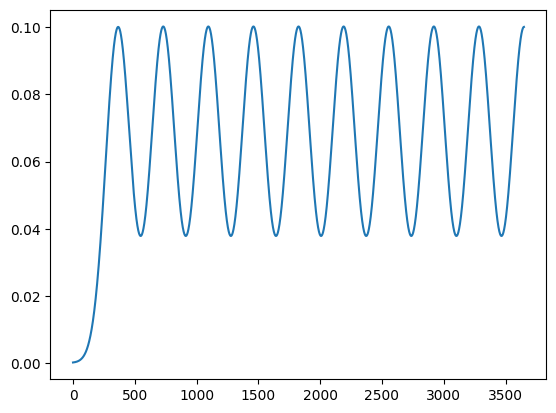

In [363]:
'''Three species model of a food chain'''
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D


def fisheries(t):
    max_size = 0.1
    sigma = 10000
    return max_size * np.exp(-1/2 * ((t-365)**2)/sigma) + max_size * np.exp(-1/2 * ((t-730)**2)/sigma) + max_size * np.exp(-1/2 * ((t-1095)**2)/sigma)\
+ max_size * np.exp(-1/2 * ((t-1460)**2)/sigma) + max_size * np.exp(-1/2 * ((t-1825)**2)/sigma) + max_size * np.exp(-1/2 * ((t-2190)**2)/sigma)\
+ max_size * np.exp(-1/2 * ((t-2555)**2)/sigma) + max_size * np.exp(-1/2 * ((t-2920)**2)/sigma) + max_size * np.exp(-1/2 * ((t-3285)**2)/sigma) + \
max_size * np.exp(-1/2 * ((t-3650)**2)/sigma)

plt.plot([fisheries(t) for t in range(3650)])
plt.show()

y0 = [0.75,0.15,8] #plants sheep wolves
t_span = [0,2000]

par = {"a1":5,"b1":3,"a2":0.1,"b2":2,"d1":0.4,"d2":0.01,'F':fisheries}

def FC(t,y,par):
    X,Y,Z = y
    dX = X * (1-X) - ((par['a1']*X)/(1+par['b1']*X))*Y
    dY = ((par['a1']*X)/(1+par['b1']*X)) * Y -par['d1']*Y - ((par['a2']*Y)/(1+par['b2']*Y))*Z + par['F'](t)
    dZ = ((par['a2']*Y)/(1+par['b2']*Y))*Z - par['d2']* Z

    return np.array([dX,dY,dZ])

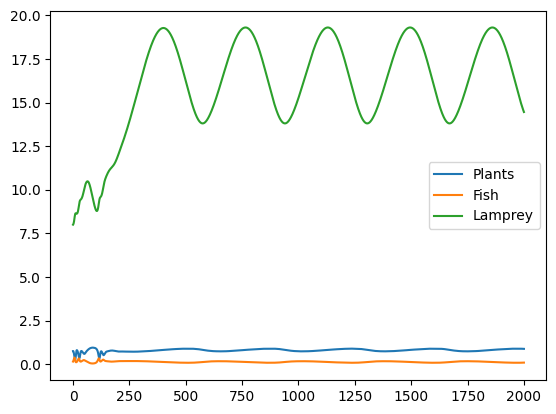

In [364]:
sol = solve_ivp(fun=lambda t,y: FC(t,y,par),t_span=t_span,y0=y0,t_eval=np.linspace(0,2000,20000))

labels = ['Plants','Fish','Lamprey']
for i in range(0,3):
    plt.plot(np.linspace(0,2000,20000),sol.y[i,:],label = labels[i])
plt.legend()

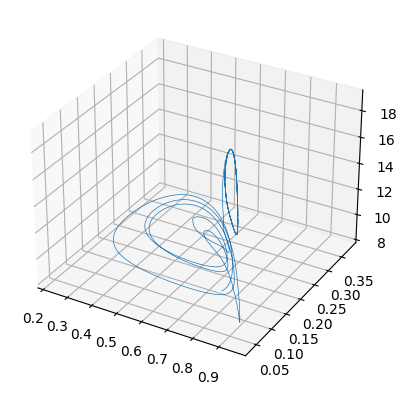

In [365]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot(sol.y[0,:],sol.y[1,:],sol.y[2,:],linewidth=0.5)

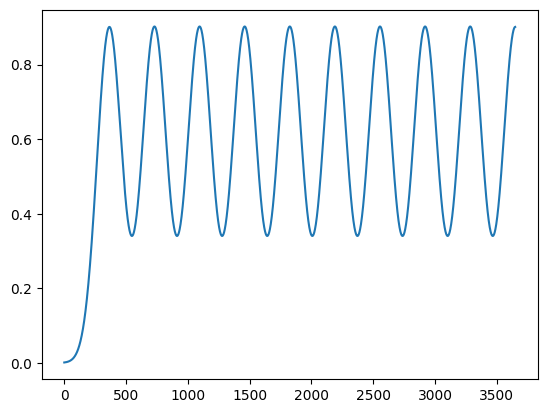

In [366]:
'''Three species model of a food chain'''
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D


def fisheries(t):
    max_size = 0.9
    sigma = 10000
    return max_size * np.exp(-1/2 * ((t-365)**2)/sigma) + max_size * np.exp(-1/2 * ((t-730)**2)/sigma) + max_size * np.exp(-1/2 * ((t-1095)**2)/sigma)\
+ max_size * np.exp(-1/2 * ((t-1460)**2)/sigma) + max_size * np.exp(-1/2 * ((t-1825)**2)/sigma) + max_size * np.exp(-1/2 * ((t-2190)**2)/sigma)\
+ max_size * np.exp(-1/2 * ((t-2555)**2)/sigma) + max_size * np.exp(-1/2 * ((t-2920)**2)/sigma) + max_size * np.exp(-1/2 * ((t-3285)**2)/sigma) + \
max_size * np.exp(-1/2 * ((t-3650)**2)/sigma)

plt.plot([fisheries(t) for t in range(3650)])
plt.show()

y0 = [0.75,0.15,4,4,4]
t_span = [0,300]

par = {"a1":5,"b1":3,"a2":0.1,"b2":2,"d1":0.4,"d2":0.01,"d3":0.1,'F':fisheries,'gamma':0.5,'alpha':0.1}

def FC(t,y,par):
    X,Y,Z_1,Z_2,Z_H = y

    Z = Z_1 + Z_2

    dX = X * (1-X) - ((par['a1']*X)/(1+par['b1']*X))*Y

    dY = ((par['a1']*X)/(1+par['b1']*X)) * Y -par['d1']*Y - ((par['a2']*Y)/(1+par['b2']*Y))*Z + par['F'](t)

    #dZ_1 = (1-par['gamma']) * ((par['a2']*Y)/(1+par['b2']*Y))*Z - par['d2']* Z_1

    dZ_1 = 0.001 * (1-par['gamma']) * Z_H - par['d2']* Z_1

    #dZ_2 = (par['gamma']) * ((par['a2']*Y)/(1+par['b2']*Y))*Z - par['d2']* Z_2

    dZ_2 = 0.001 * (par['gamma']) * Z_H - par['d2']* Z_2

    dZ_H = par['alpha'] * Z_1 * Z_2 - par['d3'] * Z_H



    return np.array([dX,dY,dZ_1,dZ_2,dZ_H])

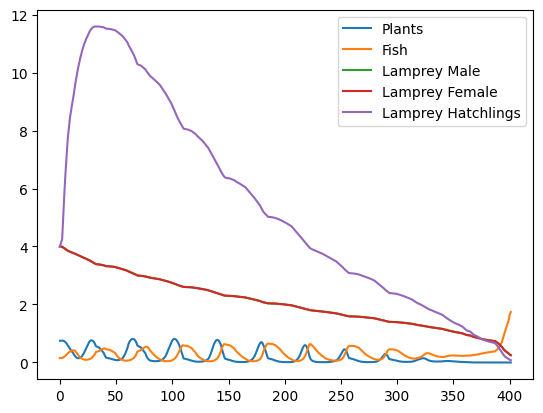

In [367]:
sol = solve_ivp(fun=lambda t,y: FC(t,y,par),t_span=t_span,y0=y0,method="LSODA")

labels = ['Plants','Fish','Lamprey Male','Lamprey Female','Lamprey Hatchlings']
for i in range(0,5):
    plt.plot(sol.y[i,:],label = labels[i])
plt.legend()